## Sección 1

Visualicen los datos para ver si pueden detectar algunos grupos. Ayuda: utilicen la
forma del sépalo

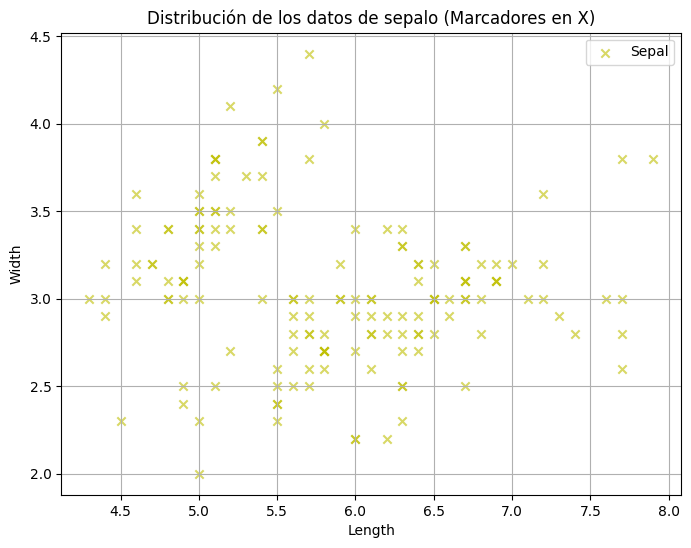

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("iris.csv")

plt.figure(figsize=(8, 6))
plt.scatter(df["sepal_length"], df["sepal_width"], alpha=0.6, label="Sepal", color='y', marker='x')
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Distribución de los datos de sepalo (Marcadores en X)")
plt.legend()
plt.grid(True)
plt.show()



Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.

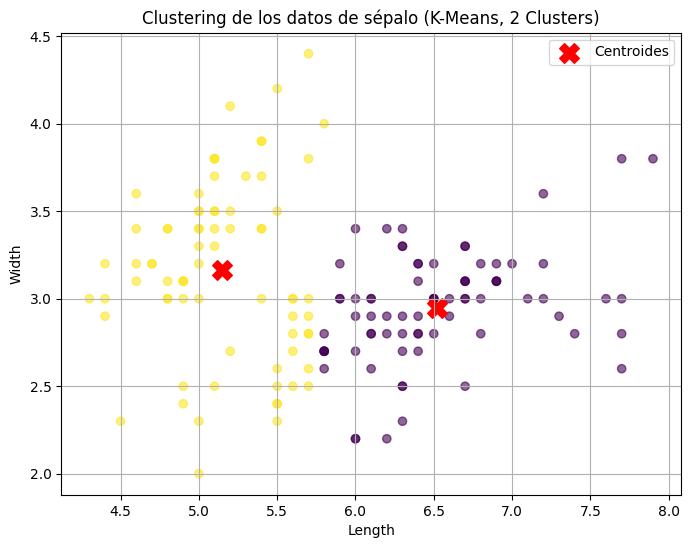

In [3]:
from sklearn.cluster import KMeans

X = df[["sepal_length", "sepal_width"]]

kmeans = KMeans(n_clusters=2)
df["cluster"] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df["sepal_length"], df["sepal_width"], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Clustering de los datos de sépalo (K-Means, 2 Clusters)")
plt.legend()
plt.grid(True)
plt.show()


Estandaricen los datos e intenten el paso 2, de nuevo. ¿Qué diferencias hay, si es que
lo hay?

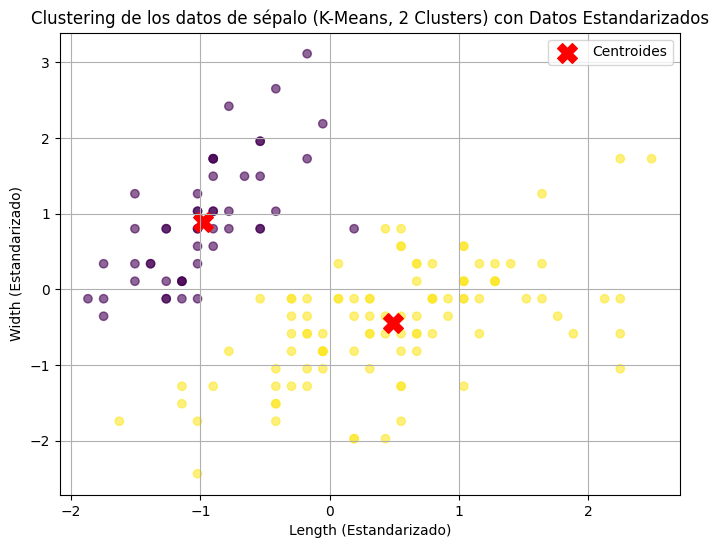

In [4]:
from sklearn.preprocessing import StandardScaler

X = df[["sepal_length", "sepal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length (Estandarizado)")
plt.ylabel("Width (Estandarizado)")
plt.title("Clustering de los datos de sépalo (K-Means, 2 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)
plt.show()

R// La principal diferencia que se puede apreciar en este inciso es que los centroides de ambos clusters han cambiado su posición y por ende los clusters han cambiado su contenido debido a la posición de los centroides.

Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un
rango de 1 a 10)

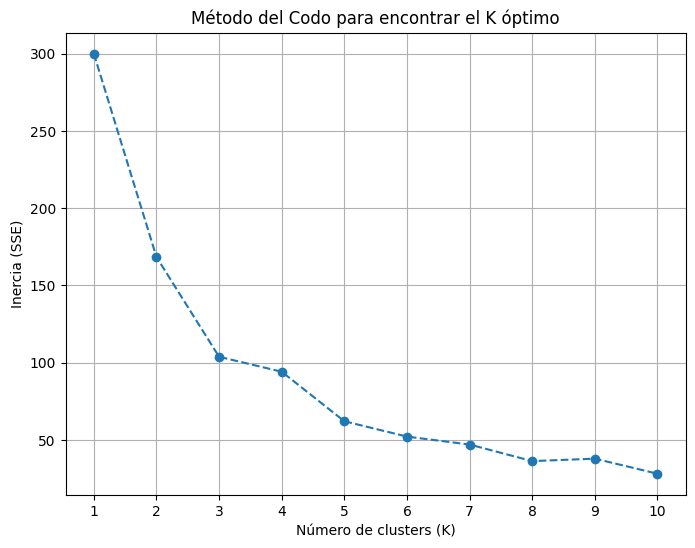

In [5]:
X = df[["sepal_length", "sepal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

inertia = []
rango_K = range(1, 11)  

for k in rango_K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_escalado)
    inertia.append(kmeans.inertia_)  
    
plt.figure(figsize=(8, 6))
plt.plot(rango_K, inertia, marker="o", linestyle="--")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia (SSE)")
plt.title("Método del Codo para encontrar el K óptimo")
plt.xticks(rango_K)
plt.grid(True)
plt.show()
    

Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos
3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

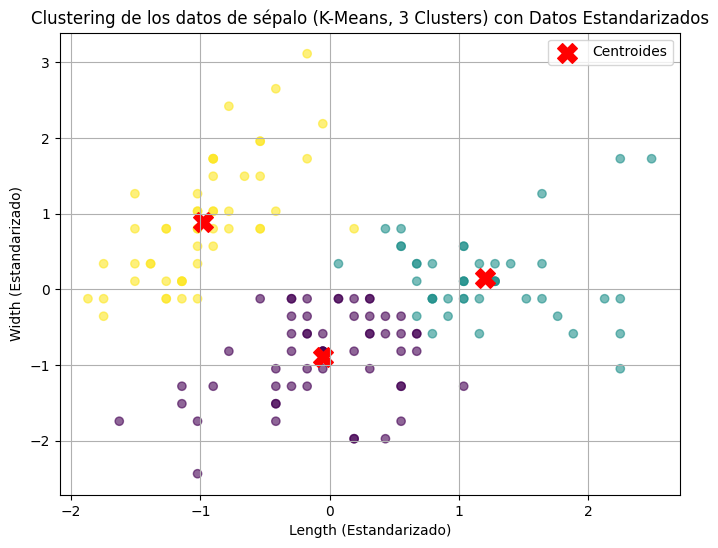

In [6]:
from sklearn.preprocessing import StandardScaler

X = df[["sepal_length", "sepal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length (Estandarizado)")
plt.ylabel("Width (Estandarizado)")
plt.title("Clustering de los datos de sépalo (K-Means, 3 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)
plt.show()

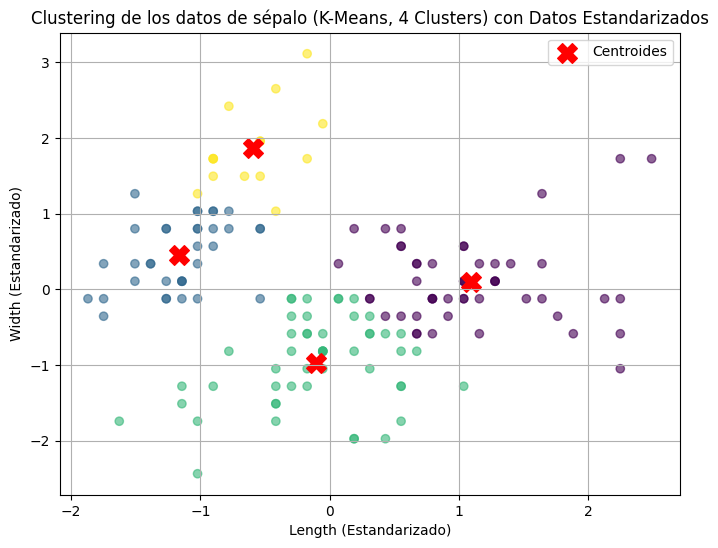

In [7]:
from sklearn.preprocessing import StandardScaler

X = df[["sepal_length", "sepal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length (Estandarizado)")
plt.ylabel("Width (Estandarizado)")
plt.title("Clustering de los datos de sépalo (K-Means, 4 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)
plt.show()

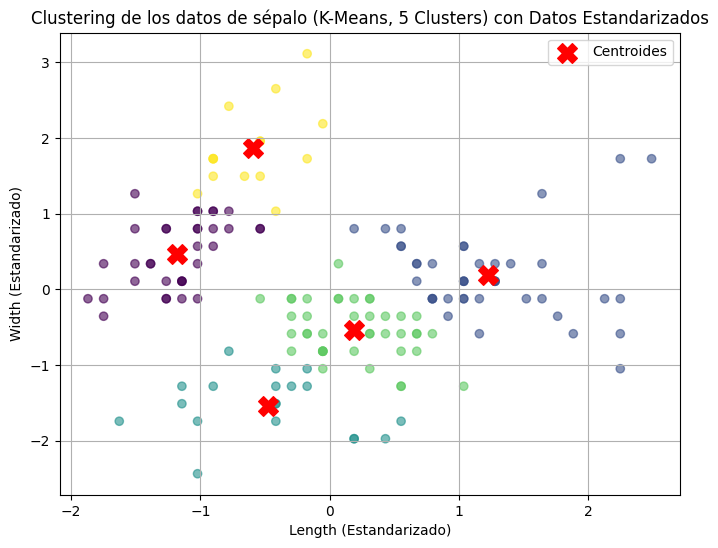

In [8]:
from sklearn.preprocessing import StandardScaler

X = df[["sepal_length", "sepal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length (Estandarizado)")
plt.ylabel("Width (Estandarizado)")
plt.title("Clustering de los datos de sépalo (K-Means, 5 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)
plt.show()

Comparen sus soluciones con los datos reales, archivo: iris-con-respuestas.csv

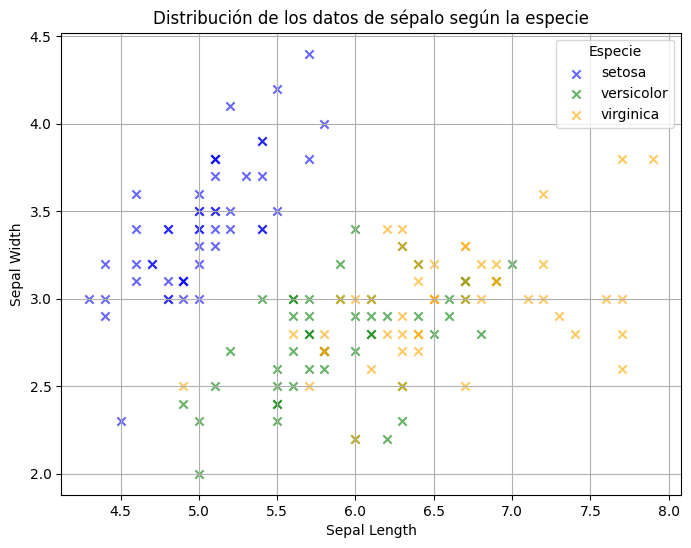

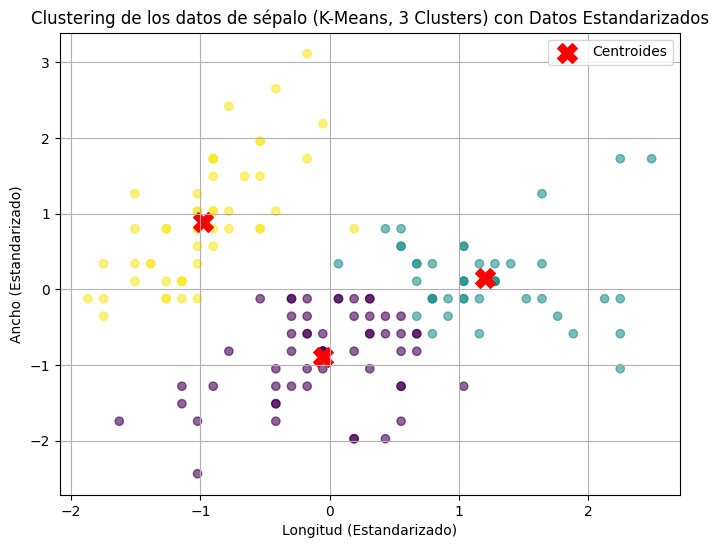

In [9]:
df_nuevo = pd.read_csv("iris-con-respuestas.csv")

especies_unicas = df_nuevo["species"].unique()
colores = ["blue", "green", "orange"]  

plt.figure(figsize=(8, 6))

for i, especie in enumerate(especies_unicas):
    subconjunto = df_nuevo[df_nuevo["species"] == especie]
    plt.scatter(subconjunto["sepal_length"], subconjunto["sepal_width"], 
                color=colores[i], alpha=0.6, label=especie, marker='x')

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Distribución de los datos de sépalo según la especie")
plt.legend(title="Especie")
plt.grid(True)

X = df_nuevo[["sepal_length", "sepal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

modelo_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_nuevo["cluster"] = modelo_kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df_nuevo["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(modelo_kmeans.cluster_centers_[:, 0], modelo_kmeans.cluster_centers_[:, 1], 
            c="red", marker="X", s=200, label="Centroides")

plt.xlabel("Longitud (Estandarizado)")
plt.ylabel("Ancho (Estandarizado)")
plt.title("Clustering de los datos de sépalo (K-Means, 3 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)

plt.show()


### Discusión


k

## Sección 2

Visualicen los datos para ver si pueden detectar algunos grupos. Ayuda: utilicen la
forma del pétalo

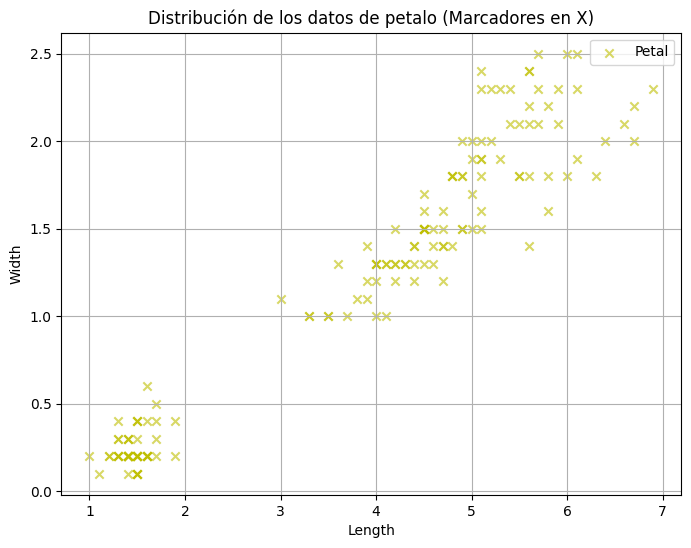

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("iris.csv")

plt.figure(figsize=(8, 6))
plt.scatter(df["petal_length"], df["petal_width"], alpha=0.6, label="Petal", color='y', marker='x')
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Distribución de los datos de petalo (Marcadores en X)")
plt.legend()
plt.grid(True)
plt.show()



Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.

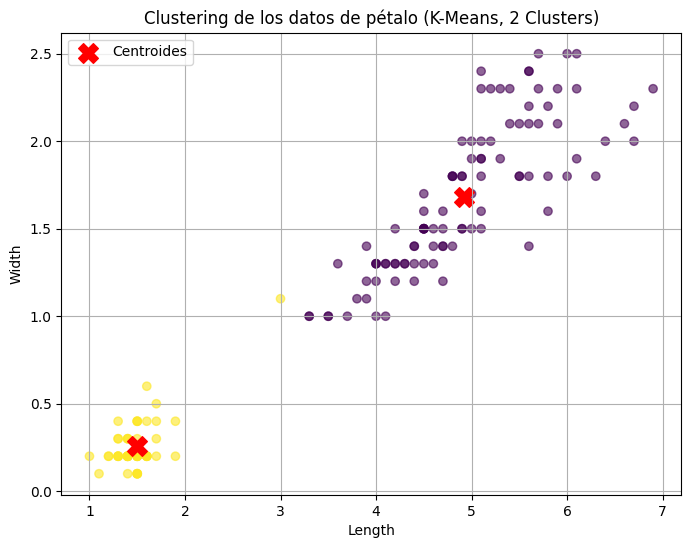

In [12]:
from sklearn.cluster import KMeans

X = df[["petal_length", "petal_width"]]

kmeans = KMeans(n_clusters=2)
df["cluster"] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df["petal_length"], df["petal_width"], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Clustering de los datos de pétalo (K-Means, 2 Clusters)")
plt.legend()
plt.grid(True)
plt.show()

Estandaricen los datos e intenten el paso 2, de nuevo. ¿Qué diferencias hay, si es que
lo hay?

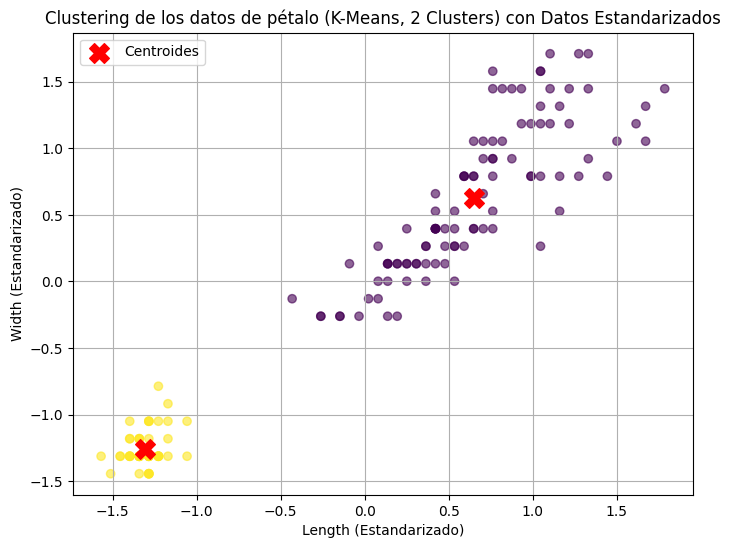

In [13]:
from sklearn.preprocessing import StandardScaler

X = df[["petal_length", "petal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length (Estandarizado)")
plt.ylabel("Width (Estandarizado)")
plt.title("Clustering de los datos de pétalo (K-Means, 2 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)
plt.show()

R//

Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un
rango de 1 a 10)

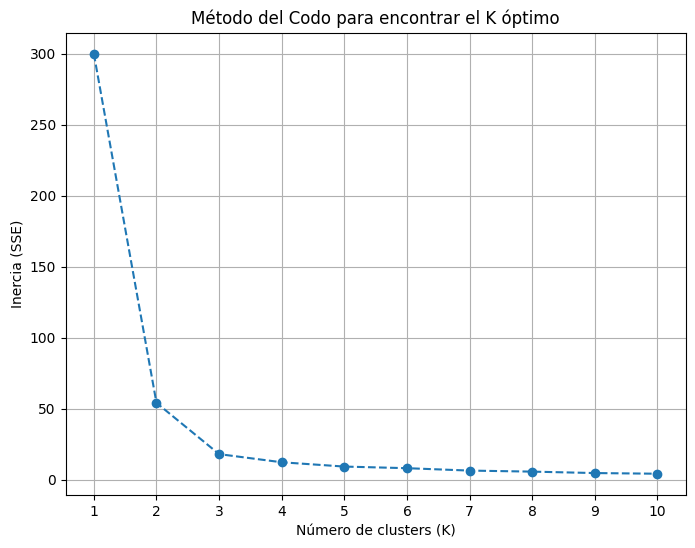

In [14]:
X = df[["petal_length", "petal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

inertia = []
rango_K = range(1, 11)  

for k in rango_K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_escalado)
    inertia.append(kmeans.inertia_)  
    
plt.figure(figsize=(8, 6))
plt.plot(rango_K, inertia, marker="o", linestyle="--")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia (SSE)")
plt.title("Método del Codo para encontrar el K óptimo")
plt.xticks(rango_K)
plt.grid(True)
plt.show()

Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos
3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

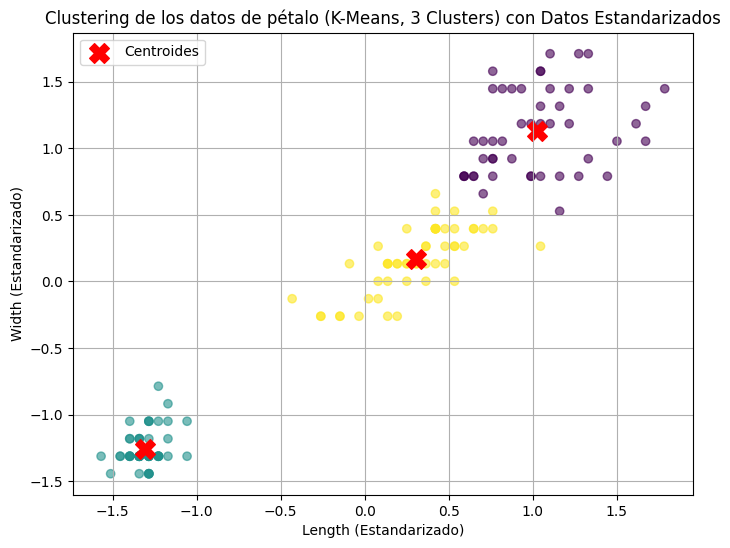

In [15]:
from sklearn.preprocessing import StandardScaler

X = df[["petal_length", "petal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length (Estandarizado)")
plt.ylabel("Width (Estandarizado)")
plt.title("Clustering de los datos de pétalo (K-Means, 3 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)
plt.show()

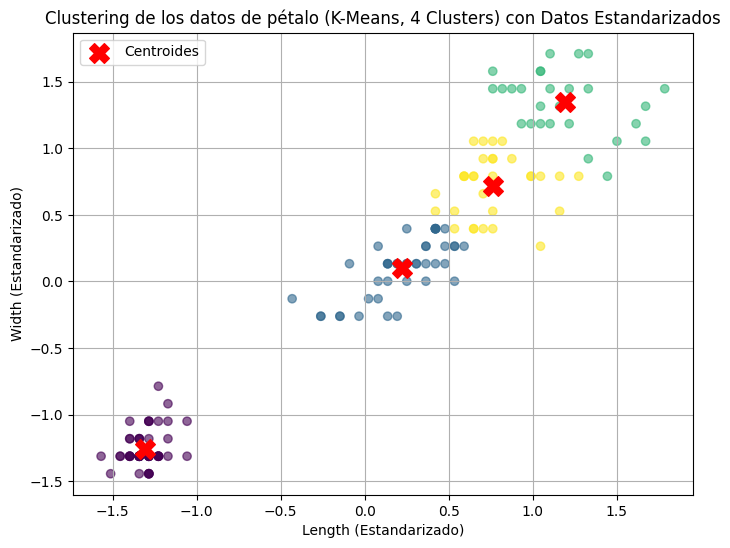

In [16]:
from sklearn.preprocessing import StandardScaler

X = df[["petal_length", "petal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length (Estandarizado)")
plt.ylabel("Width (Estandarizado)")
plt.title("Clustering de los datos de pétalo (K-Means, 4 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)
plt.show()

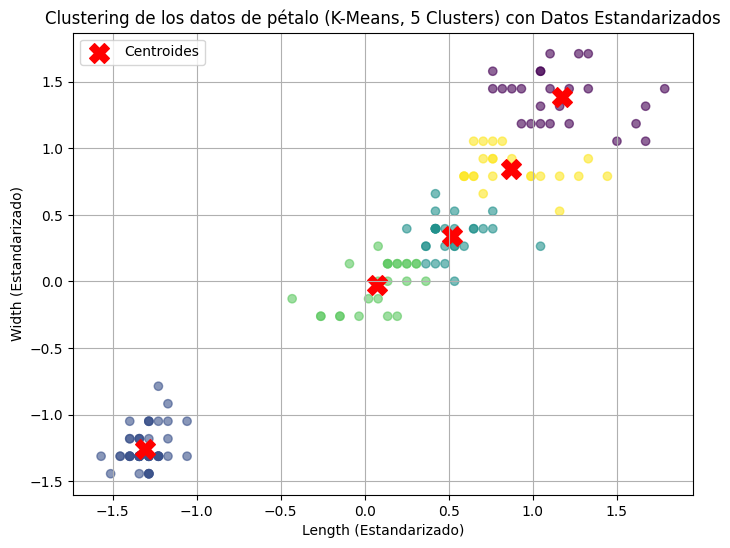

In [18]:
from sklearn.preprocessing import StandardScaler

X = df[["petal_length", "petal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Length (Estandarizado)")
plt.ylabel("Width (Estandarizado)")
plt.title("Clustering de los datos de pétalo (K-Means, 5 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)
plt.show()

Comparen sus soluciones con los datos reales, archivo: iris-con-respuestas.csv

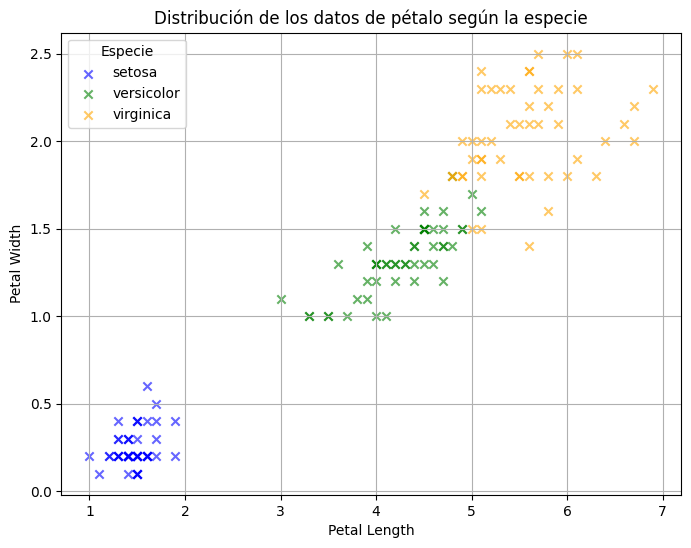

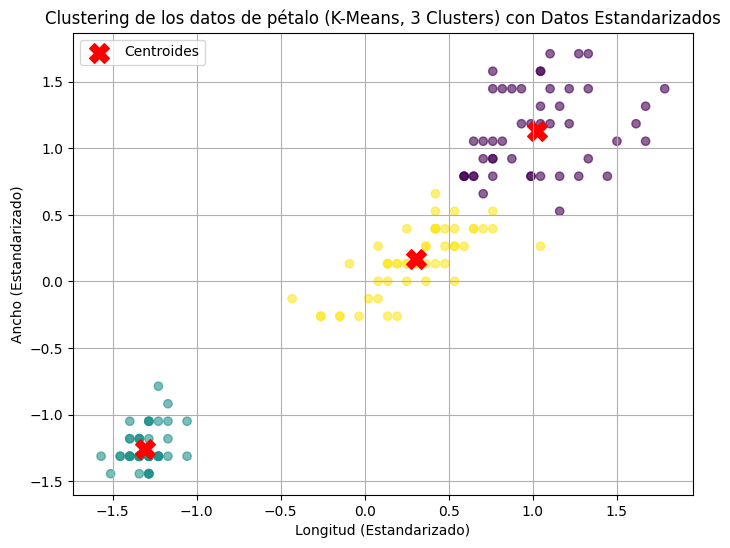

In [19]:
df_nuevo = pd.read_csv("iris-con-respuestas.csv")

especies_unicas = df_nuevo["species"].unique()
colores = ["blue", "green", "orange"]  

plt.figure(figsize=(8, 6))

for i, especie in enumerate(especies_unicas):
    subconjunto = df_nuevo[df_nuevo["species"] == especie]
    plt.scatter(subconjunto["petal_length"], subconjunto["petal_width"], 
                color=colores[i], alpha=0.6, label=especie, marker='x')

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Distribución de los datos de pétalo según la especie")
plt.legend(title="Especie")
plt.grid(True)

X = df_nuevo[["petal_length", "petal_width"]]

escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

modelo_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_nuevo["cluster"] = modelo_kmeans.fit_predict(X_escalado)

plt.figure(figsize=(8, 6))
plt.scatter(X_escalado[:, 0], X_escalado[:, 1], c=df_nuevo["cluster"], cmap="viridis", alpha=0.6, marker='o')
plt.scatter(modelo_kmeans.cluster_centers_[:, 0], modelo_kmeans.cluster_centers_[:, 1], 
            c="red", marker="X", s=200, label="Centroides")

plt.xlabel("Longitud (Estandarizado)")
plt.ylabel("Ancho (Estandarizado)")
plt.title("Clustering de los datos de pétalo (K-Means, 3 Clusters) con Datos Estandarizados")
plt.legend()
plt.grid(True)

plt.show()

### Discusión

k

## Sección 3

Utilicen la librería "kneed" y vean si el resultado coincide con el método del "codo" que
hicieron manualmente. ¿A que podría deberse la diferencia, si la hay? ¿Les dió el
número correcto de clusters, comparado a los datos reales?
Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?

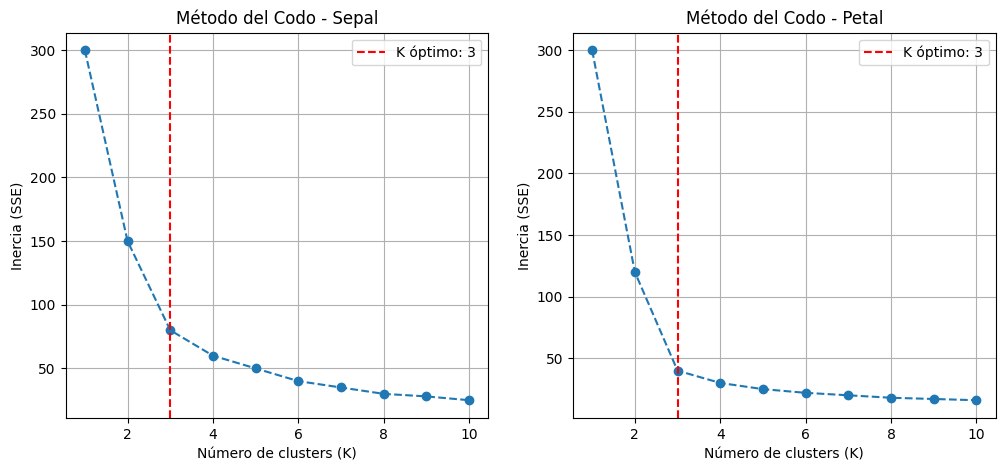

(3, 3)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

inertia_sepal = [300, 150, 80, 60, 50, 40, 35, 30, 28, 25]  
inertia_petal = [300, 120, 40, 30, 25, 22, 20, 18, 17, 16]  
rango_K = np.arange(1, 11)

kneedle_sepal = KneeLocator(rango_K, inertia_sepal, curve="convex", direction="decreasing")
k_optimo_sepal = kneedle_sepal.elbow

kneedle_petal = KneeLocator(rango_K, inertia_petal, curve="convex", direction="decreasing")
k_optimo_petal = kneedle_petal.elbow

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(rango_K, inertia_sepal, marker="o", linestyle="--")
plt.axvline(x=k_optimo_sepal, color="r", linestyle="--", label=f"K óptimo: {k_optimo_sepal}")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia (SSE)")
plt.title("Método del Codo - Sepal")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(rango_K, inertia_petal, marker="o", linestyle="--")
plt.axvline(x=k_optimo_petal, color="r", linestyle="--", label=f"K óptimo: {k_optimo_petal}")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia (SSE)")
plt.title("Método del Codo - Petal")
plt.legend()
plt.grid(True)

plt.show()

k_optimo_sepal, k_optimo_petal
